<a href="https://colab.research.google.com/github/danielleitesoares/Work_Sentimental_Analyzer_Of_Restaurant_Issue/blob/main/Analise_dos_Sentimentos_Restaurantes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <center>Universidade do Estado do Amazon</center>
###  <center>Escola Superior de Tecnologia</center>
#####  <center>Pós-graduação Lato Sensu em Ciência de Dados</center>
#####  <center>Programação para Ciência de Dados (Turma 02)</center>
---
## <center>Trabalho de Análise de Sentimetos</center>
##### <center>Professor: <a href="http://tiagodemelo.info/" target="_blank">Dr. Tiago de Melo</a></center>
###### <center>Equipe: Daniel Soares, Leonardo Rocha, Paulo Corrêa</center>



##### Seções Trabalho
* [1. Contextualização do Trabalho](#sec1)

* [2. Importação das Bibliotecas](#sec2)
  
* [3. Abertura e Tratamento do DataSet e criação do DataFrame](#sec3)
  
* [4. Informações e Estatísticas do DataFrame](#sec4)
  
* [5. Gráficos de relacionamentos do DataFrame](#sec5)

* [6. Outras maneira de exibir estatísticas e informações sobre o DF](#sec5)

* [7. Análise de Sentimentos](#sec6)



### **1.Contextualização do Trabalho**

Trabalho para aprendizagem de técnicas e métodos de análise de sentimentos usando programação em Python e demais bibliotecas.



### **2.Importação das Bibliotecas**




In [39]:
#Bibliotecas Básicas
!pip install sweetviz -q
!pip install -U pandas-profiling
!pip install --user -q datascience
!pip install --user -q pandas-profiling 

import pandas as pd
import numpy as np
import json
import nltk
nltk.download('punkt')
from textblob import TextBlob
import time  # avaliar
import sys
import unicodedata
import requests

#Bibliotecas de Gráficos e Relatórios 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import pandas_profiling as ppf
from pandas_profiling import ProfileReport
import sweetviz as sv
from IPython.display import Image
from bs4 import BeautifulSoup
import re
import random as rd 
#Bibliotecas de Análise de Sentimentos
import textblob


Requirement already up-to-date: pandas-profiling in /usr/local/lib/python3.6/dist-packages (2.9.0)
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


### **3. Abertura e Tratamento do DataSet e criação do DataFrame**


##### 3.1. Abrindo o repositório do DataSet




In [40]:
! git clone https://github.com/paulordie/sentimental_ds
%cd sentimental_ds/

Cloning into 'sentimental_ds'...
remote: Enumerating objects: 14, done.
remote: Counting objects: 100% (14/14), done.
remote: Compressing objects: 100% (10/10), done.
remote: Total 109 (delta 5), reused 13 (delta 4), pack-reused 95
Receiving objects: 100% (109/109), 90.58 MiB | 15.84 MiB/s, done.
Resolving deltas: 100% (55/55), done.
Checking out files: 100% (14/14), done.
/content/sentimental_ds/sentimental_ds


##### 3.2.Abertura e Tratamento do DataSet e criação do DataFrame



In [41]:
dados = open('dataset-v2.dat')
a = dados.readlines()# Criar uma lista com todos as linhas em strings 
v = [] # vetor para salvar cada linha em json  
#Comando for para correr por cada item de "a" que está as linhas 
for c in a:
  parsed_c = json.loads(c) #Traransformar as strings de "a" em arquivos json
  data = pd.json_normalize(parsed_c) #Normalizando o arquivo json 
  v.append(data)#jogamos os arquivos em 'V', 
  #aqui vamos concatenar cada linha que está em 'V' para um unico dataset df 
df = pd.concat(objs=v,axis=0) # Concatenando 

##### 3.3 Salvando em outros formatos

In [ ]:
#Montando o local no google drive pra salvar
#import pandas as pd
#from google.colab import drive
#drive.mount("/content/drive")
#Converterndo e Salvando em CSV
#df.to_csv('/content/drive/My Drive/dataset123.csv')#salvando o arquivo em csv  \\\\\\\\\\\\\\\\\\\\\verificar
#Convertendo e salvar em excel 
df.to_excel('/dataset.xlsx')

##### 3.4 Ajustando nome de colunas e exibindo o Head do DataFrame

In [42]:
df = df.rename(columns={'itemReviewed.name':'Name','itemReviewed.address.streetAddress':'StressAddress','itemReviewed.address.addressLocality':'AddressLocality','itemReviewed.address.addressRegion':'AddressRegion','itemReviewed.address.postalCode':'PostalCode','itemReviewed.address.country':'Country','itemReviewed.website':'Website','itemReviewed.email':'Email','itemReviewed.phoneNumber':'PhoneNumber','itemReviewed.averageRating':'AverageRating'})
df = df.reset_index(drop=True)
df.head(10)

,title,reviewId,restaurantId,author,reviewBody,language,mobileDevice,userLocation,publicationDate,visitDate,ratingValue,Name,StressAddress,AddressLocality,AddressRegion,PostalCode,Country,Website,Email,PhoneNumber,AverageRating
0,Jantar,692856288,2344932,larinhavercosa222,"Comida maravilhosa, lugar do verdadeiro chicle...",pt,True,"São Carlos, SP",26/07/2019,07/2019,5,Imperador dos Camarões,Avenida Doutor Antônio Gouveia,,Alagoas,57030-170,Brasil,http://www.imperadordoscamaroes.com.br,contato@imperadordoscamaroes.com.br,+55 82 3231-4134,4.5
1,Uma boa experiência.,229208487,3720906,Pano P,"Comida boa, drinks legais e um ambiente bem ac...",pt,True,"Manaus, AM",16/09/2014,None,4,Guacamole Natal,Avenida Praia de Ponta Negra 9068 Ponta Negra,,Rio Grande do Norte,59092-100,Brasil,http://www.facebook.com/GuacamoleNatal,guacamolenatal@gmail.com,+55 84 3219-3646,4.5
2,Otimo self service,679002332,2248105,Magma100,"Excelente pra ir com a família! Ótima Comida, ...",pt,True,"Goiânia, GO",04/06/2019,07/2018,4,Chica Pitanga,Rua Petrolina 19,Recife,Pernambuco,51021-250,Brasil,http://www.chicapitanga.com.br,chicapitanga@chicapitanga.com.br,+55 81 3334-8260,4.5
3,O sorvete mais tradicional do estado,355671519,8168302,Yurie M,Tomo sorvete na Visabor faz mais de 30 anos. S...,pt,False,"Aracaju, SE",15/03/2016,01/2016,5,Sorvetes Vi Sabor,Avenida Francisco Porto 59 Grageru,Aracaju,Sergipe,,Brasil,None,None,None,4.0
4,Melhor hamburger!,268741921,5395141,Debora_C85,O melhor hamburger que já comi! Excelente aten...,pt,False,"Rio de Janeiro, RJ",28/04/2015,04/2015,5,Z Deli Sandwich Shop,Rua Haddock Lobo 1386 Jardins,São Paulo,Estado de São Paulo,01414-002,Brasil,http://www.facebook.com/zdelisandwichshop/,None,551130830021,4.5
5,Um achado maravilhoso!,482361860,12209902,Monique C,"O restaurante é novo, super acolhedor e charmo...",pt,False,None,07/05/2017,05/2017,5,Trattoria della Gloria,Rua do Russel 450,Rio de Janeiro,Estado do Rio de Janeiro,22210-010,Brasil,https://www.facebook.com/trattoriadellagloria....,info@trattoriadellagloria.com.br,+55 21 3435-6789,4.5
6,Saboroso,431356071,5565144,ChrisWings,"Fomos num sábado, ambiente elegante, equipe ge...",pt,True,"Brasília, DF",24/10/2016,10/2016,4,Tomyam,"José Maria Lisboa, 1065 Jardim Paulista",São Paulo,Estado de São Paulo,01423-003,Brasil,http://www.tomyam.com.br/,tomyamsp@tomyamsp.com.br,+55 11 4329-1002,4.0
7,Bom trabalho,361607766,2408078,lucianasoares18,Comida ótima e com bom atediamento e com muita...,pt,False,"Vila Velha, ES",04/04/2016,04/2016,4,Ilha do Caranguejo - Vitória,"Rua Alcino Pereira Netto, 570 - Jardim Camburi...",Vitória,Espírito Santo,29090-540,Brasil,http://www.ilhadocaranguejo.com.br,ilha@ilha.es,+55 27 3395-0244,4.5
8,Maravilhoso!,622424870,9738862,Andrezza O,"Ambiente agradável, preço totalmente acessível...",pt,True,"Teresina, PI",05/10/2018,10/2018,5,Vertigo Restaurante,"R. Aviador Irapua Rocha, 2370 Bairro Ininga",Teresina,Piauí,64049-740,Brasil,None,None,08632334338,4.0
9,Mais tradicional de BH,400149803,3514720,Leonardo R,A pizzaria é a mais tradicional de Belo Horizo...,pt,False,"Belo Horizonte, MG",01/08/2016,07/2016,5,Pizzarella,"Av. Olegário Maciel, 2.280 - Lourdes",Belo Horizonte,Minas Gerais,,Brasil,http://www.pizzarellasaobento.com.br/home/defa...,None,(31) 3292-3000,4.0


### ***4. Informações e Estatísticas do DataFrame***

##### 4.1 Informações Gerais sobre o DF. Informações de quantidades de registros, número de colunas, quais os atributos e seus tipos. Semelhante a utilização dos comandos   df.types(), df.insa().sum(), df.count(), df.shpe()

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 21 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   title            100000 non-null  object
 1   reviewId         100000 non-null  object
 2   restaurantId     99999 non-null   object
 3   author           99999 non-null   object
 4   reviewBody       99999 non-null   object
 5   language         100000 non-null  object
 6   mobileDevice     100000 non-null  object
 7   userLocation     100000 non-null  object
 8   publicationDate  100000 non-null  object
 9   visitDate        100000 non-null  object
 10  ratingValue      100000 non-null  object
 11  Name             100000 non-null  object
 12  StressAddress    100000 non-null  object
 13  AddressLocality  100000 non-null  object
 14  AddressRegion    100000 non-null  object
 15  PostalCode       100000 non-null  object
 16  Country          100000 non-null  object
 17  Website    

##### 4.2 Exibindo linha que está com os atributos incompletos

In [ ]:
dfcolor = df[df.isnull().any(axis=1)]
dfcolor.head()
dfcolor.style.highlight_null(subset=['restaurantId','author','reviewBody'])

### 5. Gráficos de relacionamentos do DataFrame

####5.1  Avalições de estabelicimentos por Estados em ordem descrescente.

In [ ]:
df_Adressregion = df['AddressRegion'].value_counts().to_frame() # https://www.kaggle.com/parulpandey/five-ways-to-use-value-counts https://re-thought.com/pandas-value_counts/https://re-thought.com/pandas-value_counts/
df_Adressregion.head()

,AddressRegion
Estado de São Paulo,17455
Estado do Rio de Janeiro,10583
Rio Grande do Norte,7075
Ceará,6206
Bahia,6030


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26]),
 <a list of 27 Text major ticklabel objects>)

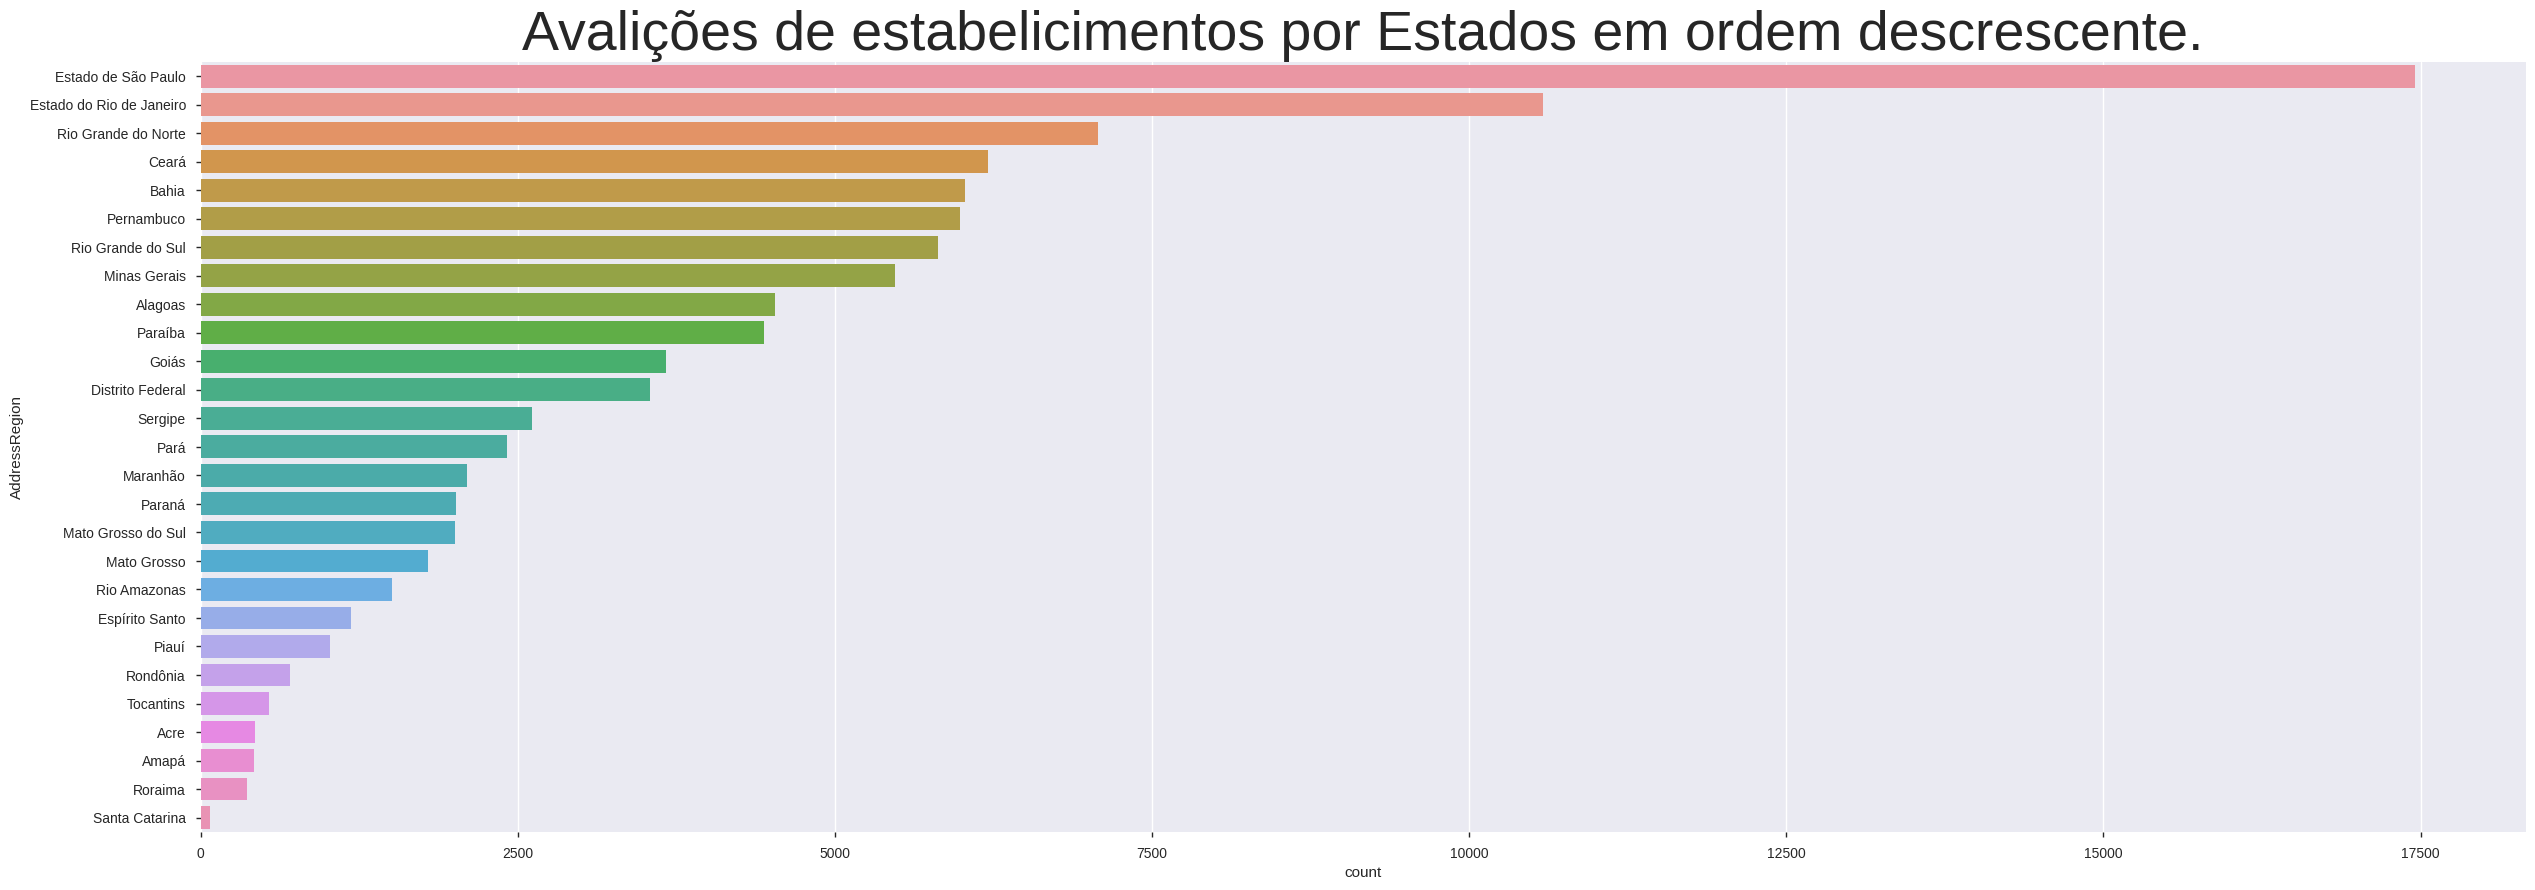

In [ ]:
#Gráfico de Estados com mais avalições em ordem descrescente. 
fig = plt.figure(figsize=(30,10)) 
sns.countplot(y='AddressRegion', order = df['AddressRegion'].value_counts().index, data=df)
plt.title('Avalições de estabelicimentos por Estados em ordem descrescente.',fontsize=40)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
#plt.ylim(0.1,30)

##### 4.1 Salvando em outros formatos

####5.2 Avaliações por tipo dispositivos

Text(0.5, 1.0, 'Percentual de avaliação por dispositivos')

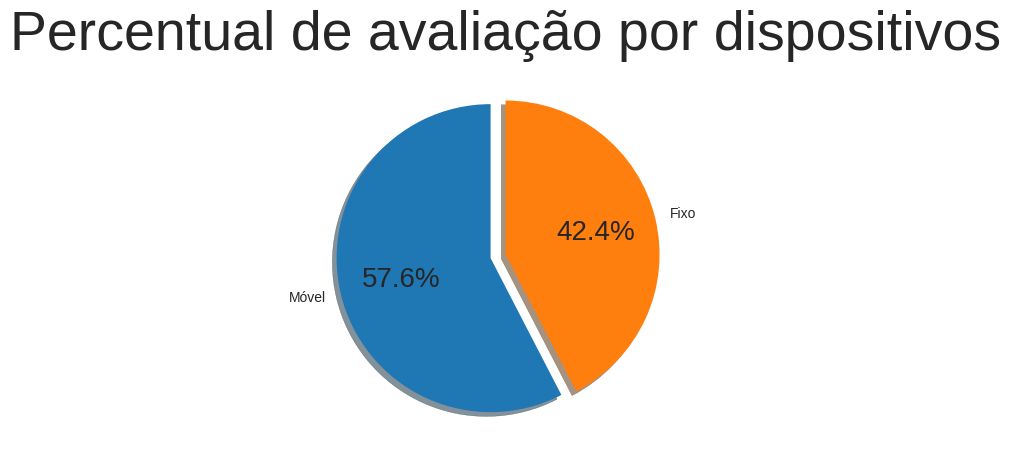

In [ ]:
# Percentual de avaliação por dispositivos - https://www.youtube.com/watch?v=wYxDyg1UnMw

plt.rcParams.update({'font.size':20})
rotulos = ['Móvel', 'Fixo']
dfdisp = df.groupby(by='mobileDevice').size()
explode = (0.1,0)
plt.figure(figsize=(5,5))
plt.pie(x=dfdisp, labels=rotulos,explode=explode, autopct='%1.1f%%', startangle=90, shadow=True)
plt.title('Percentual de avaliação por dispositivos',fontsize=40)
##plt.show()

####5.3 Avalições de Estabelecimentos do Amazonas



In [66]:
df_am = df[df['AddressRegion']=='Rio Amazonas'] 
df_am.head()
df_am2= df_am['Name'].value_counts().to_frame()
df_am2.head(10)

,Name
Banzeiro,209
Coco Bambu Manaus,154
Cachaçaria do Dedé e Empório - Manauara Shopping,118
Tambaqui de Banda - Parque 10,77
La Parrilla,74
Caxiri Manaus,57
Churrascaria Búfalo,49
Choupana,46
Bar Do Armando,37
O Lenhador,29


In [ ]:
df_am2.sum()

Name    1506
dtype: int64

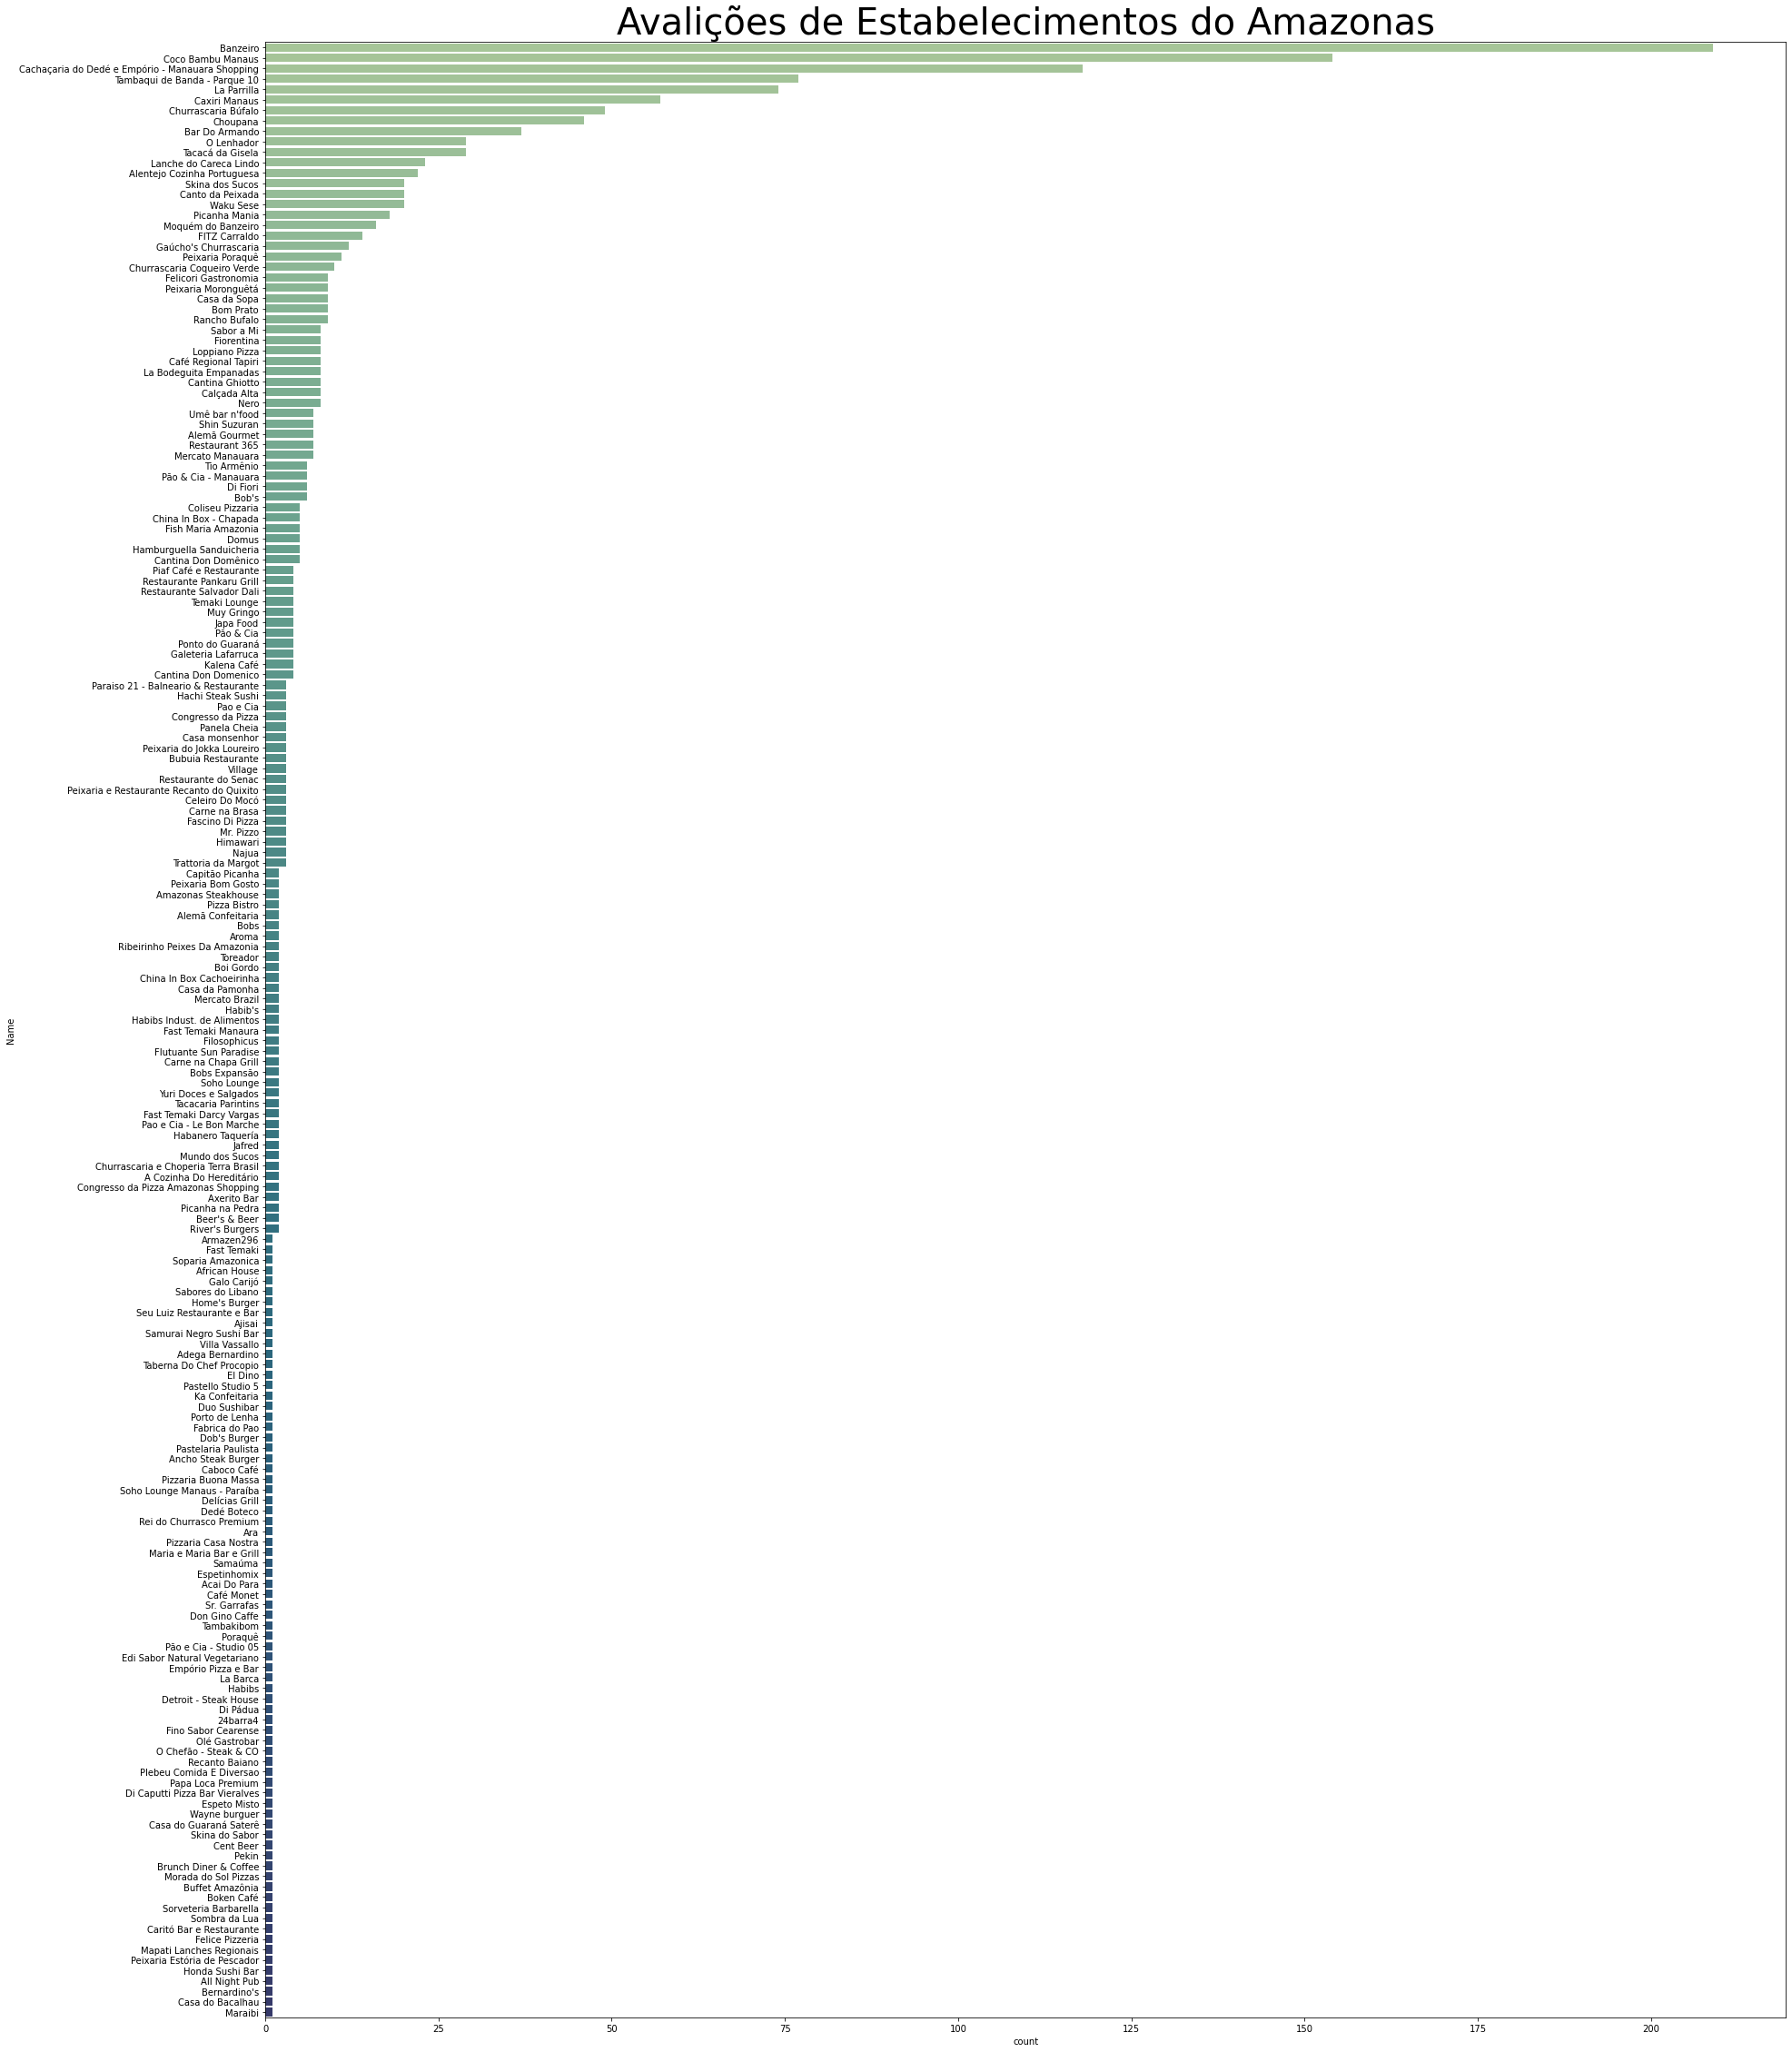

In [67]:
fig = plt.figure(figsize=(30,40))
plt.title('Avalições de Estabelecimentos do Amazonas',fontsize=40)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
sns.countplot(y='Name', order = df_am['Name'].value_counts().index, data=df_am, palette='crest')

#### 5.4 Avaliações por Localização do Usuários

In [ ]:
# Divide o campo User Location com os valores após a , para uma nova coluna denominadas de Estado e Cidade, https://pt.linkedin.com/pulse/dividindo-colunas-por-delimitador-com-python-fernanda-santos
divisao = df['userLocation'].str.split(',') 
Cidade = divisao.str.get(0) 
Estado = divisao.str.get(1)
df['Cidade'] = Cidade.str.upper()
df['Estado'] = Estado.str.upper()
df.head()

,title,reviewId,restaurantId,author,reviewBody,language,mobileDevice,userLocation,publicationDate,visitDate,ratingValue,Name,StressAddress,AddressLocality,AddressRegion,PostalCode,Country,Website,Email,PhoneNumber,AverageRating,Cidade,Estado
0,Jantar,692856288,2344932,larinhavercosa222,"Comida maravilhosa, lugar do verdadeiro chicle...",pt,True,"São Carlos, SP",26/07/2019,07/2019,5,Imperador dos Camarões,Avenida Doutor Antônio Gouveia,,Alagoas,57030-170,Brasil,http://www.imperadordoscamaroes.com.br,contato@imperadordoscamaroes.com.br,+55 82 3231-4134,4.5,SÃO CARLOS,SP
1,Uma boa experiência.,229208487,3720906,Pano P,"Comida boa, drinks legais e um ambiente bem ac...",pt,True,"Manaus, AM",16/09/2014,None,4,Guacamole Natal,Avenida Praia de Ponta Negra 9068 Ponta Negra,,Rio Grande do Norte,59092-100,Brasil,http://www.facebook.com/GuacamoleNatal,guacamolenatal@gmail.com,+55 84 3219-3646,4.5,MANAUS,AM
2,Otimo self service,679002332,2248105,Magma100,"Excelente pra ir com a família! Ótima Comida, ...",pt,True,"Goiânia, GO",04/06/2019,07/2018,4,Chica Pitanga,Rua Petrolina 19,Recife,Pernambuco,51021-250,Brasil,http://www.chicapitanga.com.br,chicapitanga@chicapitanga.com.br,+55 81 3334-8260,4.5,GOIÂNIA,GO
3,O sorvete mais tradicional do estado,355671519,8168302,Yurie M,Tomo sorvete na Visabor faz mais de 30 anos. S...,pt,False,"Aracaju, SE",15/03/2016,01/2016,5,Sorvetes Vi Sabor,Avenida Francisco Porto 59 Grageru,Aracaju,Sergipe,,Brasil,None,None,None,4.0,ARACAJU,SE
4,Melhor hamburger!,268741921,5395141,Debora_C85,O melhor hamburger que já comi! Excelente aten...,pt,False,"Rio de Janeiro, RJ",28/04/2015,04/2015,5,Z Deli Sandwich Shop,Rua Haddock Lobo 1386 Jardins,São Paulo,Estado de São Paulo,01414-002,Brasil,http://www.facebook.com/zdelisandwichshop/,None,551130830021,4.5,RIO DE JANEIRO,RJ


In [ ]:
df['nest']=len(df[('Estado')])

In [ ]:
df.dtypes

title               object
reviewId            object
restaurantId        object
author              object
reviewBody          object
language            object
mobileDevice        object
userLocation        object
publicationDate     object
visitDate           object
ratingValue         object
Name                object
StressAddress       object
AddressLocality     object
AddressRegion       object
PostalCode          object
Country             object
Website             object
Email               object
PhoneNumber         object
AverageRating      float64
Cidade              object
Estado              object
nest                 int64
dtype: object

In [ ]:
df_Estado = df['Estado'].value_counts().to_frame()[:20] # https://www.kaggle.com/parulpandey/five-ways-to-use-value-counts https://re-thought.com/pandas-value_counts/https://re-thought.com/pandas-value_counts/
df_Estado.head(10)

,Estado
SP,20673
RJ,9780
MG,6422
DF,5605
RS,5398
BA,4445
PE,4220
CE,3539
PR,3088
GO,2950


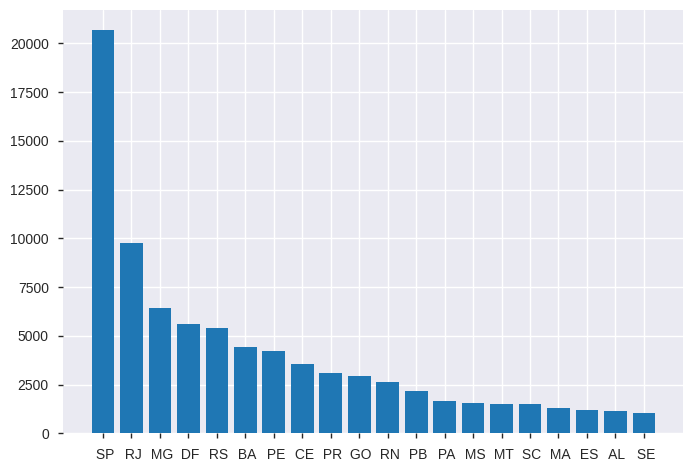

In [ ]:
plt.bar(df_Estado.index,df_Estado['Estado'])
plt.show()

#### 5.5 Avaliações por ano

In [ ]:
#Converter 	a coluna  publicationDate para data
df['publicationDate'] = pd.to_datetime(df['publicationDate'])
df.dtypes

In [ ]:
ddt= df.groupby(df['publicationDate'].dt.year).size().reset_index().rename(columns={0: 'Total', 'publicationDate':'Date'})
ddt= f = ddt.rename(columns={'publicationDate':'Date'})
ddt.head(20).T

In [ ]:
x = ddt['Date']
y = ddt['Total']
plt.figure(figsize=(30,10))#tamanho do grafico
plt.plot(x,y,label='Número de Avaliações',color='blue',linestyle='--',linewidth=2,marker = "*")#plot para grafico de linhas 
#titulo
plt.title('Número de Avaliações por Ano')
#EIXO X
plt.xlabel('Ano')
#EIXO Y 
plt.ylabel('Número de Avaliações')
plt.grid(True)
plt.legend()

#### 5.6 Os 10 restaurantes mais avaliados no Brasil

In [72]:
df['Name'].value_counts().reset_index()[:10]

,index,Name
0,Coco Bambu Frutos do Mar,1083
1,Camarões Restaurante,1068
2,Mangai,1023
3,Camarões Potiguar,699
4,Imperador dos Camarões,661
5,Bodega do Sertão,608
6,Coco Bambu Meireles,595
7,Coco Bambu Porto Alegre,431
8,Nau Frutos do Mar,425
9,Coco Bambu - Dom Pastel,421


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

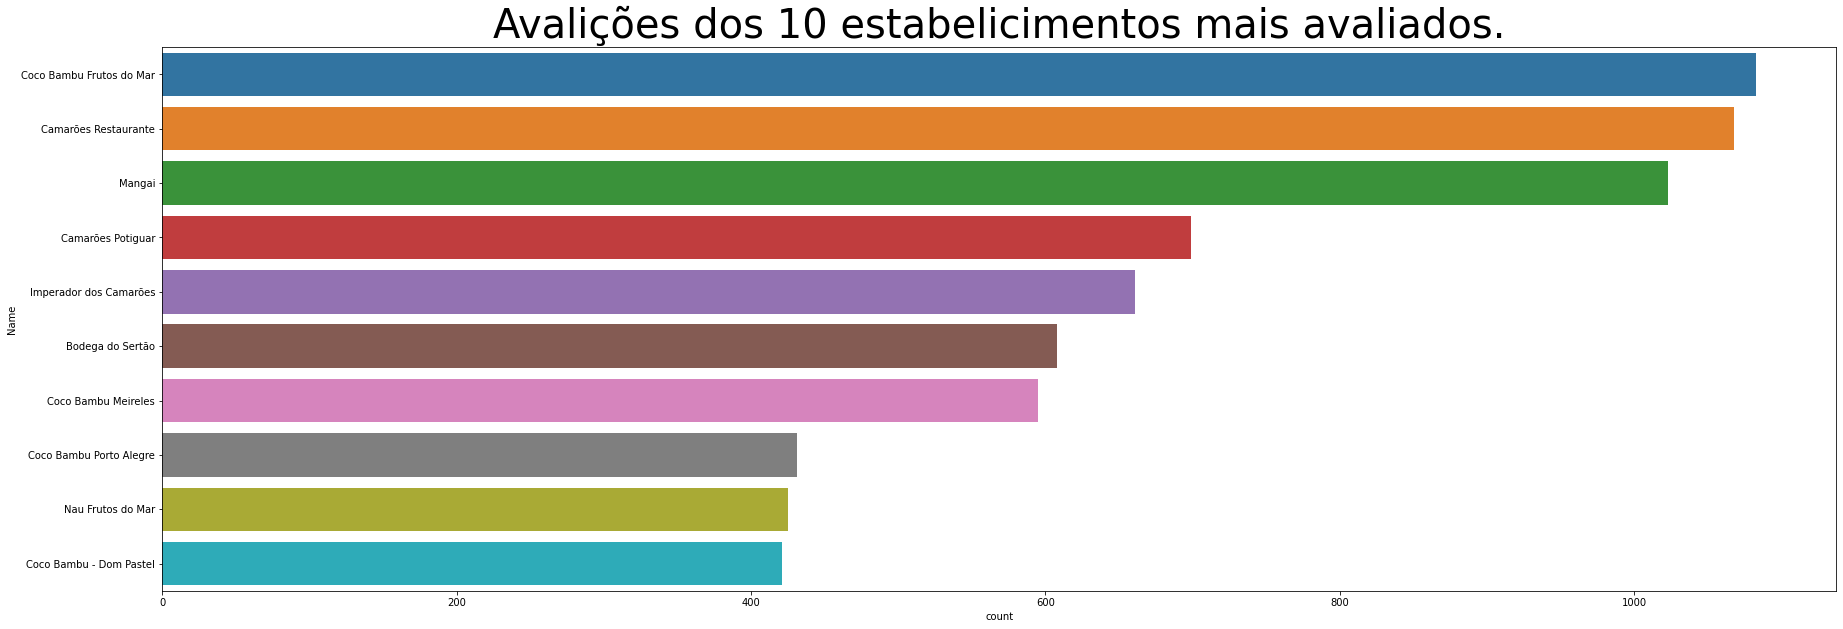

In [74]:
fig = plt.figure(figsize=(30,10)) 
sns.countplot(y='Name', order = df['Name'].value_counts().iloc[:10].index, data=df)
plt.title('Avalições dos 10 estabelicimentos mais avaliados.',fontsize=40)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)


### 6. Outras maneira de exibir estatísticas e informações sobre o DF, usando as bibliotecas SWEETVIZ e PANDAS-PROFILING


####6.1 Montando área para salvar os relatórios

In [27]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


####6.2 Análises, estítiscas e informações gerais sobre o DF

In [ ]:
from IPython.display import Image
df_analysis=sv.analyze(df)
df_analysis.show_html('analises_gerais_do_DF.html')


####6.3 Relatório de informações gerais

In [ ]:
design_report = ProfileReport(df) 
design_report.to_file (output_file = 'profile.html')

In [ ]:
import pandas_profiling
import pandas_profiling as ppf
ppf.ProfileReport(df)

####6.5 Avaliações por tipo dispositivos

# **PAULO, VOCÊ FAZ OS SEUS COMITES DESSA SEÇÃO EM DIANTE, OK?**

### **7. Analise dos Sentimentos** 

##Seleção do número aleatório de 200 sentenças

In [ ]:
def twoHandSentences():
  import random as rd
  arm = []
  for x in range(0,200):
    rand = rd.randint(0,10000)
    #print(f'{x} rand {rand}')
    arm.append(rand)
  return arm
_Sentences = twoHandSentences()
print(_Sentences[0])
sizeFinal = len(_Sentences)

982


##Carregamento do itens selecionado aleatoriamente da base de dados

In [ ]:
def arrangeSentences(_Sentences):
  armSent = []
  x = 0
  for sent in _Sentences:
    init = json.loads(a[sent])
    dados = pd.json_normalize(init)
    armSent.append(dados)
  return armSent

sentencesWereSaved = arrangeSentences(_Sentences)


In [ ]:
arrange = pd.concat(objs=sentencesWereSaved, axis=0)


In [ ]:
def takeOneSentence():
  toTakeOne = twoHandSentences()
  oneSentence = arrangeSentences(toTakeOne[0])
  return oneSentence

In [ ]:
def clean_tripadvisor(tweet):
    try:
        tweet = BeautifulSoup(tweet, 'lxml').get_text() # o lxml indica o parse pode ser usado para dados de web por ex
        tweet = re.sub(r"\b\s-\s", ' ', tweet)
        # tweet = re.sub(r"\s....", '', tweet)
        tweet = re.sub(r"\b\.\s\\n", '. \n', tweet)
        tweet = re.sub(r"\b\.", '. \n', tweet)    
        return tweet
    except TypeError:
        print("Errou o tipo no regex")

#Avaliação se Subjetiva ou factual

In [ ]:
def whichIsSentence(subj,pol):
  if subj == 0.0 and pol == 0.0:
    print("subjetiva")
  elif subj < 1.1 and pol == 1.1:
    print("positivo com alto indice subjetivo") 
  

##Métodos de avaliação: Precisão, Renovação e Medida-F

In [ ]:
def methodAvailablePrecision(A,B):
  
  pass

In [ ]:
def methodAvailableRenovation(A,B):
  
  pass

In [ ]:
def methodAvailableF1(A,B):
  
  pass

##Avaiable each sentence

In [ ]:
def englishSentence(whichLanguage):
    comentatio_pt = whichLanguage.translate(to='pt')
    comentario_us = comentatio_pt.translate(to='us')
    
    time.sleep(5)

    for sentence_pt, sentence in zip(comentatio_pt.sentences, comentario_us.sentences):
        
        if sentence_pt is None:
            errou = errou + 1
            print("errou em {} - {} {}".format(var,errou,x))
            #saveDocumentError(var,errou,x)

        elif var > inicio and var <= terminou:
            print('Polaridade->',sentence_pt, ':', sentence.sentiment.polarity)
            print('subjetividade->',sentence_pt, ':', sentence.sentiment.subjectivity)
            #saveDocument(var,sentence_pt,sentence.sentiment.subjectivity,sentence.sentiment.polarity, 'fim')

        else:
            print("EN algum erro ocorreu em {}".format(sentence_pt))
            

In [ ]:
def portugueseSentence(out):
    comentario = TextBlob(out)

    comentario_us = comentario.translate(to='us')
    
    print("Inglês: ",comentario_us)
    time.sleep(5)

    for sentence_pt, sentence in zip(comentario.sentences, comentario_us.sentences):
    
        if sentence_pt is None:
            errou = errou + 1
            print("errou em {} - {} {}".format(var,errou,x))
            #saveDocumentError(var,errou,x)

        elif var > inicio and var <= terminou:
            print('Polaridade->',sentence_pt, ':', sentence.sentiment.polarity)
            print('subjetividade->',sentence_pt, ':', sentence.sentiment.subjectivity)
            #saveDocument(var,sentence_pt,sentence.sentiment.subjectivity,sentence.sentiment.polarity, 'fim')

        else:
            print("PT algum erro ocorreu em {}".format(sentence_pt))
            


In [ ]:
def enterToTextBlob(out):
    try:
        whichLanguage = TextBlob(out)
        
        lang = whichLanguage.detect_language()
        if lang == 'en':
            print("It is english")
            englishSentence(whichLanguage)

        elif lang == 'pt':
            print("It is portuguese")
            portugueseSentence(out)
          
        else:
            print("Not english")
    except TypeError:
        print("Errou não é tipo string")

In [ ]:
inicio = 0
terminou = 1
var = 0
errou = 0

ini = time.time()

for x in arrange['reviewBody']:
    
    var = var + 1
    if var > inicio and var <= terminou:
        print("**************\n")
        print( "ReviewBody {} x {}".format(var,x))
        print("**************\n")
        out = clean_tripadvisor(x)
        try:
            enterToTextBlob(out)
        except Exception as ex:
            print(ex)
            continue
    else:
        print("Finalizou em ",var)
        break
fim = time.time()
print("tempo final foi ", ini-fim)

**************

ReviewBody 1 x Sou super fã desses gelatos principalmente o chocolate belga, o meu preferido. tudo muito sensacional, sempre estou levando novos amigos para apreciar a delicia que são. No meu casamento servi, para os convidados, gelato Belga, Ninho, Ferreiro Rochê e Limão. Foi o melhor investimento que fiz, todos, todos mesmo, adoraram.
**************

It is portuguese
Inglês:  I'm a super fan of these gelatoes, especially Belgian chocolate, my favorite.
 all very sensational, I am always taking new friends to appreciate the delight that they are.
 At my wedding I served Belgian gelato, Ninho, Ferreiro Rochet and Lemon for the guests.
 It was the best investment I made, everyone, everyone, really loved it.
Polaridade-> Sou super fã desses gelatos principalmente o chocolate belga, o meu preferido. : 0.27777777777777773
subjetividade-> Sou super fã desses gelatos principalmente o chocolate belga, o meu preferido. : 0.8888888888888888
Polaridade-> tudo muito sensacional, s